<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_kmeans_PCA_Elbow_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans

In [ ]:
food = pd.read_csv('/content/Food_Delivery_Route_Efficiency_Dataset.csv')

In [ ]:
food

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
0,1,7.97,63.8,High,9.75,Bicycle,Clear,2025-01-01 15:29,South,North
1,2,0.90,7.6,High,1.28,Car,Cloudy,2025-01-03 00:47,West,North
2,3,11.12,78.0,Medium,16.65,Bike,Rainy,2025-01-04 17:32,South,Central
3,4,4.90,24.8,Low,5.25,Scooter,Rainy,2025-01-01 14:12,Central,Central
4,5,10.04,56.0,High,11.34,Car,Rainy,2025-01-02 16:50,West,North
...,...,...,...,...,...,...,...,...,...,...
195,196,9.02,38.4,Low,9.57,Bike,Cloudy,2025-01-03 09:22,Central,South
196,197,6.73,59.2,Low,10.04,Bike,Cloudy,2025-01-03 03:32,South,South
197,198,6.98,51.4,High,7.83,Scooter,Cloudy,2025-01-01 08:03,Central,West
198,199,3.80,29.2,Medium,5.34,Bicycle,Rainy,2025-01-04 07:34,South,North


In [ ]:
food.isnull().sum()

,0
order_id,0
distance_km,0
delivery_time_min,0
traffic_level,0
route_length_km,0
delivery_mode,0
weather,0
order_time,0
restaurant_zone,0
customer_zone,0


In [ ]:
food.duplicated().sum()

np.int64(0)

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           200 non-null    int64  
 1   distance_km        200 non-null    float64
 2   delivery_time_min  200 non-null    float64
 3   traffic_level      200 non-null    object 
 4   route_length_km    200 non-null    float64
 5   delivery_mode      200 non-null    object 
 6   weather            200 non-null    object 
 7   order_time         200 non-null    object 
 8   restaurant_zone    200 non-null    object 
 9   customer_zone      200 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 15.8+ KB


In [ ]:
food.head()

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
0,1,7.97,63.8,High,9.75,Bicycle,Clear,2025-01-01 15:29,South,North
1,2,0.90,7.6,High,1.28,Car,Cloudy,2025-01-03 00:47,West,North
2,3,11.12,78.0,Medium,16.65,Bike,Rainy,2025-01-04 17:32,South,Central
3,4,4.90,24.8,Low,5.25,Scooter,Rainy,2025-01-01 14:12,Central,Central
4,5,10.04,56.0,High,11.34,Car,Rainy,2025-01-02 16:50,West,North


In [ ]:
#food['order_time'] = food['order_time'].astype('datetime64[ns]')

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           200 non-null    int64  
 1   distance_km        200 non-null    float64
 2   delivery_time_min  200 non-null    float64
 3   traffic_level      200 non-null    object 
 4   route_length_km    200 non-null    float64
 5   delivery_mode      200 non-null    object 
 6   weather            200 non-null    object 
 7   order_time         200 non-null    object 
 8   restaurant_zone    200 non-null    object 
 9   customer_zone      200 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 15.8+ KB


In [ ]:
food.isnull().sum()

,0
order_id,0
distance_km,0
delivery_time_min,0
traffic_level,0
route_length_km,0
delivery_mode,0
weather,0
order_time,0
restaurant_zone,0
customer_zone,0


In [ ]:
food

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
0,1,7.97,63.8,High,9.75,Bicycle,Clear,2025-01-01 15:29,South,North
1,2,0.90,7.6,High,1.28,Car,Cloudy,2025-01-03 00:47,West,North
2,3,11.12,78.0,Medium,16.65,Bike,Rainy,2025-01-04 17:32,South,Central
3,4,4.90,24.8,Low,5.25,Scooter,Rainy,2025-01-01 14:12,Central,Central
4,5,10.04,56.0,High,11.34,Car,Rainy,2025-01-02 16:50,West,North
...,...,...,...,...,...,...,...,...,...,...
195,196,9.02,38.4,Low,9.57,Bike,Cloudy,2025-01-03 09:22,Central,South
196,197,6.73,59.2,Low,10.04,Bike,Cloudy,2025-01-03 03:32,South,South
197,198,6.98,51.4,High,7.83,Scooter,Cloudy,2025-01-01 08:03,Central,West
198,199,3.80,29.2,Medium,5.34,Bicycle,Rainy,2025-01-04 07:34,South,North


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in food.select_dtypes(include=['object']).columns:
  food[i] = le.fit_transform(food[i])


In [ ]:
food

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
0,1,7.97,63.8,0,9.75,0,0,15,3,2
1,2,0.90,7.6,0,1.28,2,1,88,4,2
2,3,11.12,78.0,2,16.65,1,2,192,3,0
3,4,4.90,24.8,1,5.25,3,2,13,0,0
4,5,10.04,56.0,0,11.34,2,2,71,4,2
...,...,...,...,...,...,...,...,...,...,...
195,196,9.02,38.4,1,9.57,1,1,115,0,3
196,197,6.73,59.2,1,10.04,1,1,100,3,3
197,198,6.98,51.4,0,7.83,3,1,0,0,4
198,199,3.80,29.2,2,5.34,0,2,166,3,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in food.columns:
  sc.fit_transform(food[[i]])

In [ ]:
food

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
0,1,7.97,63.8,0,9.75,0,0,15,3,2
1,2,0.90,7.6,0,1.28,2,1,88,4,2
2,3,11.12,78.0,2,16.65,1,2,192,3,0
3,4,4.90,24.8,1,5.25,3,2,13,0,0
4,5,10.04,56.0,0,11.34,2,2,71,4,2
...,...,...,...,...,...,...,...,...,...,...
195,196,9.02,38.4,1,9.57,1,1,115,0,3
196,197,6.73,59.2,1,10.04,1,1,100,3,3
197,198,6.98,51.4,0,7.83,3,1,0,0,4
198,199,3.80,29.2,2,5.34,0,2,166,3,2


In [ ]:
wcss = []

In [ ]:
for i in range(1,11):
  K_means = KMeans(n_clusters=i,init = 'k-means++',random_state = 42)
  K_means = K_means.fit(food)
  wcss.append(K_means.inertia_)

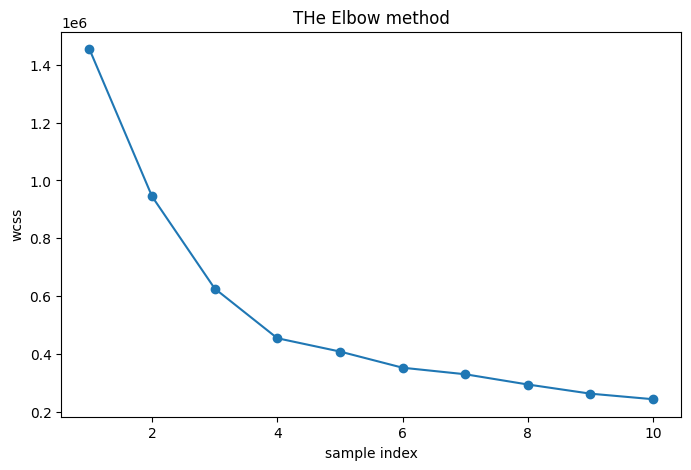

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss[:10],marker='o')
plt.title('THe Elbow method')
plt.xlabel('sample index')
plt.ylabel('wcss')
plt.show()

In [ ]:
model = KMeans(n_clusters =2,init = 'k-means++',random_state = 42 )
y_kmeans = model.fit_predict(food)
food['cluster'] = y_kmeans

In [ ]:
food

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone,cluster
0,1,7.97,63.8,0,9.75,0,0,15,3,2,0
1,2,0.90,7.6,0,1.28,2,1,88,4,2,0
2,3,11.12,78.0,2,16.65,1,2,192,3,0,0
3,4,4.90,24.8,1,5.25,3,2,13,0,0,0
4,5,10.04,56.0,0,11.34,2,2,71,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,9.02,38.4,1,9.57,1,1,115,0,3,1
196,197,6.73,59.2,1,10.04,1,1,100,3,3,1
197,198,6.98,51.4,0,7.83,3,1,0,0,4,1
198,199,3.80,29.2,2,5.34,0,2,166,3,2,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Drop 'order_id' and the problematic 'cluster' column before applying PCA
x_pca = pca.fit_transform(food.drop(columns=['order_id', 'cluster']))
x_pca

array([[-83.64358628,  20.23851204],
       [-11.43424179, -38.03374289],
       [ 93.54845048,  33.19983478],
       [-86.19630826, -19.02400769],
       [-27.74634865,  12.33111765],
       [-43.45616559,  33.39724909],
       [-11.78562414,  10.815554  ],
       [-16.80028915,   8.21465766],
       [-96.40760715,  38.71678809],
       [-92.29518028, -27.08781015],
       [ 36.12874469,   2.38550004],
       [ 11.83282869, -16.98665396],
       [ 10.61012732,  39.23795945],
       [ 43.58872973, -36.44775847],
       [  5.25366189,  12.63041066],
       [ 61.77138921, -22.7169425 ],
       [ 31.93051994,  -9.91887348],
       [ -3.70304556,  15.95984875],
       [-26.42536254, -35.95687182],
       [ 70.70337451, -28.35429017],
       [-95.83345721,   7.41394402],
       [ 21.09124797,   1.33700396],
       [-46.50504733, -42.80509748],
       [ 97.91833973, -12.48848926],
       [ 60.49574499, -43.77355652],
       [-34.16591181, -18.60447114],
       [-46.92472087,   0.73026177],
 

<Axes: >

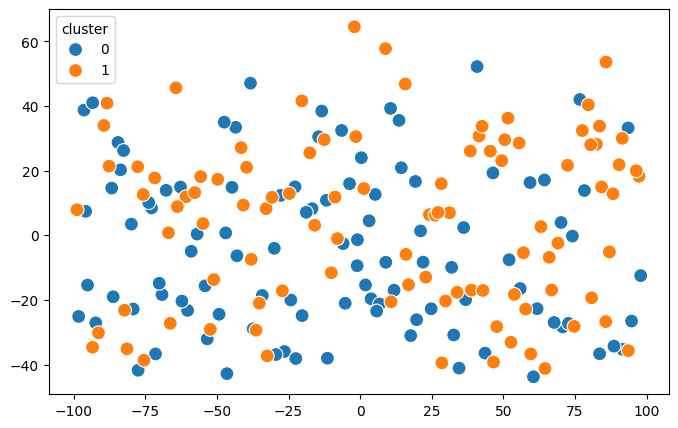

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=food['cluster'],palette='tab10',s=100)